# Color Segmentation

In this notebook we are going to be introducing the concept of **color segmentation**, specifically we're going to be using the opencv function **inRange()** as well as the conversion to a new color space called **HSV** which stands for *hue saturation and value*.

The example we'll be using is splitting the opencv image logo into its three different objects based on segmenting out the color alone

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

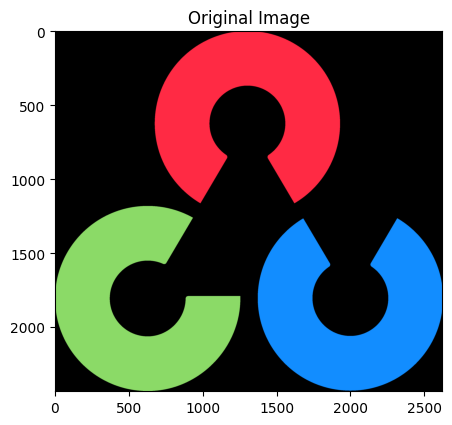

In [2]:
img = cv2.imread("./opencv_logo.png", cv2.IMREAD_COLOR)

# Display
plt.figure(figsize=(5, 5))
plt.imshow(img[:, :, ::-1])  # Swap the color channels from BGR to RGB
plt.title("Original Image");

## Convert the image to HSV

Similar to the RGB color space, HSV contains three channels, instead of these channels representing how much Blue, Green and Red contribute to a single pixel, HSV instead defines the color of a single pixel stands in terms of Hue, Saturation, and Value. Both BGR and HSV take up the same number of channels, so we can convert from one to the other with minimal impact to our image (small rounding errors may take effect).

+ Value: It represents how dark or light an image, pure black 0 and pure white 255.
+ Saturation: Defines how much color is being contributed to a given pixel
+ Hue: Defines the cylinder's perimeter (0 - 180)

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [4]:
# Set the range for red color.
r_lb = np.array([165, 50, 50], np.uint8)
r_ub = np.array([180, 255, 255], np.uint8)

# set the range for green color.
g_lb = np.array([35, 50, 50], np.uint8)
g_ub = np.array([80, 255, 255], np.uint8)

# set the range for blue color.
b_lb = np.array([95, 50, 50], np.uint8)
b_ub = np.array([125, 255, 255], np.uint8)

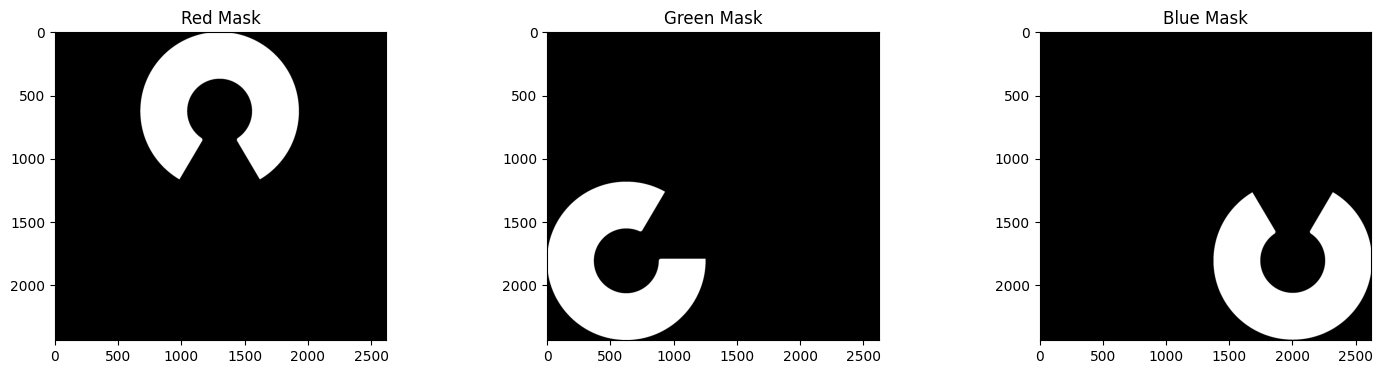

In [5]:
# Define each color mask.
r_mask = cv2.inRange(img_hsv, r_lb, r_ub)
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)
b_mask = cv2.inRange(img_hsv, b_lb, b_ub)

# Display each color mask.
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(r_mask); plt.title("Red Mask")
plt.subplot(132); plt.imshow(g_mask); plt.title("Green Mask")
plt.subplot(133); plt.imshow(b_mask); plt.title("Blue Mask");

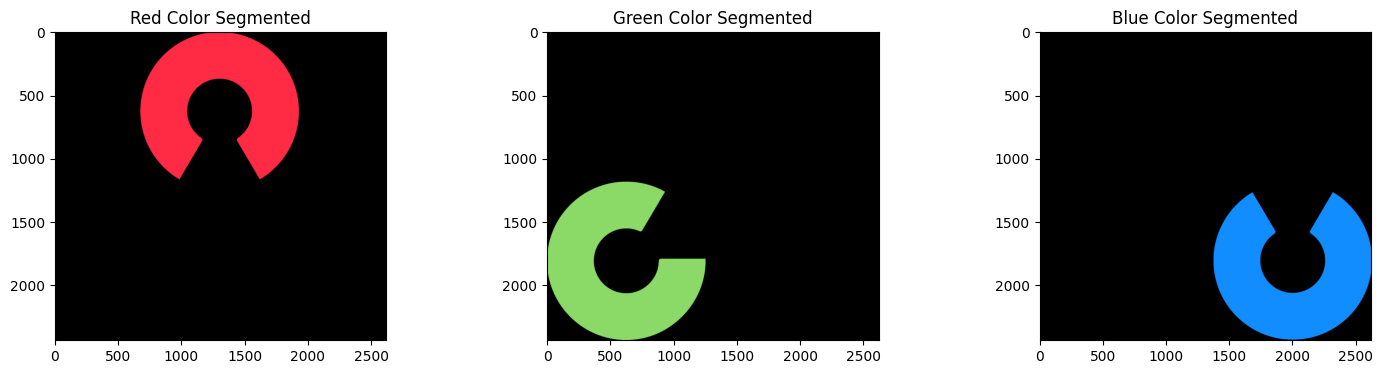

In [6]:
# Segment the colors.
r_seg = cv2.bitwise_and(img, img, mask=r_mask)
g_seg = cv2.bitwise_and(img, img, mask=g_mask)
b_seg = cv2.bitwise_and(img, img, mask=b_mask)

# Display the segmented colors.
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(r_seg[:, :, ::-1]); plt.title("Red Color Segmented")
plt.subplot(132); plt.imshow(g_seg[:, :, ::-1]); plt.title("Green Color Segmented")
plt.subplot(133); plt.imshow(b_seg[:, :, ::-1]); plt.title("Blue Color Segmented");

# Exercise

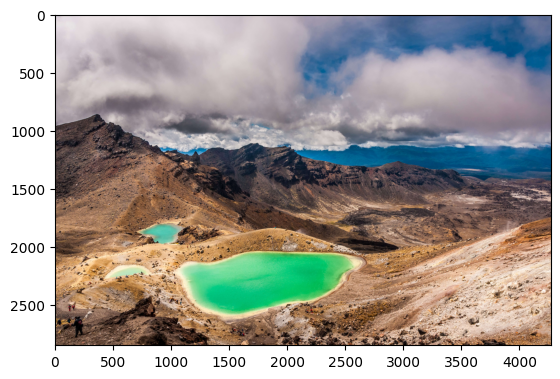

In [7]:
lake = cv2.imread("./Emerald_Lakes_New_Zealand.jpg", cv2.IMREAD_COLOR)
plt.imshow(lake[:, :, ::-1]);

(2848, 4272)


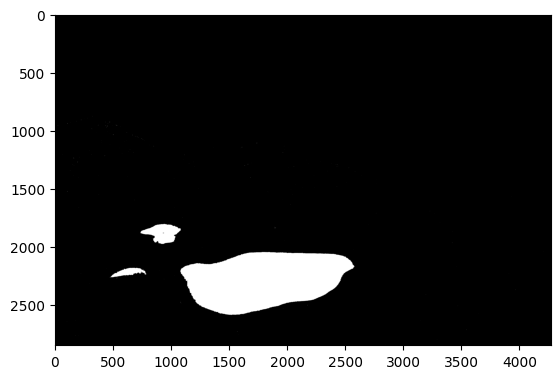

In [17]:
lake_hsv = cv2.cvtColor(lake, cv2.COLOR_BGR2HSV)
gr_lb = np.array([35, 20, 50], np.uint8)
gr_ub = np.array([85, 255, 255], np.uint8)

lake_mask = cv2.inRange(lake_hsv, gr_lb, gr_ub)

print(lake_mask.shape)
plt.imshow(lake_mask);

Text(0.5, 1.0, 'Lake Segmented')

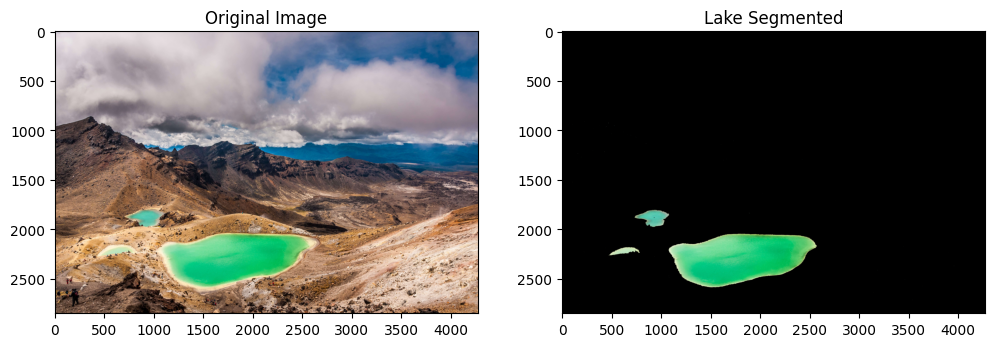

In [20]:
lake_segmented = cv2.bitwise_and(lake, lake, mask=lake_mask)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(lake[:, :, ::-1]); ax[0].set_title("Original Image")
ax[1].imshow(lake_segmented[:, :, ::-1]); ax[1].set_title("Lake Segmented")